<div class="alert alert-block alert-danger">
    <h1 style="text-align: center; color:purple;font-size:200%;">Titanic - Machine Learning from Disaster</h1>
</div>

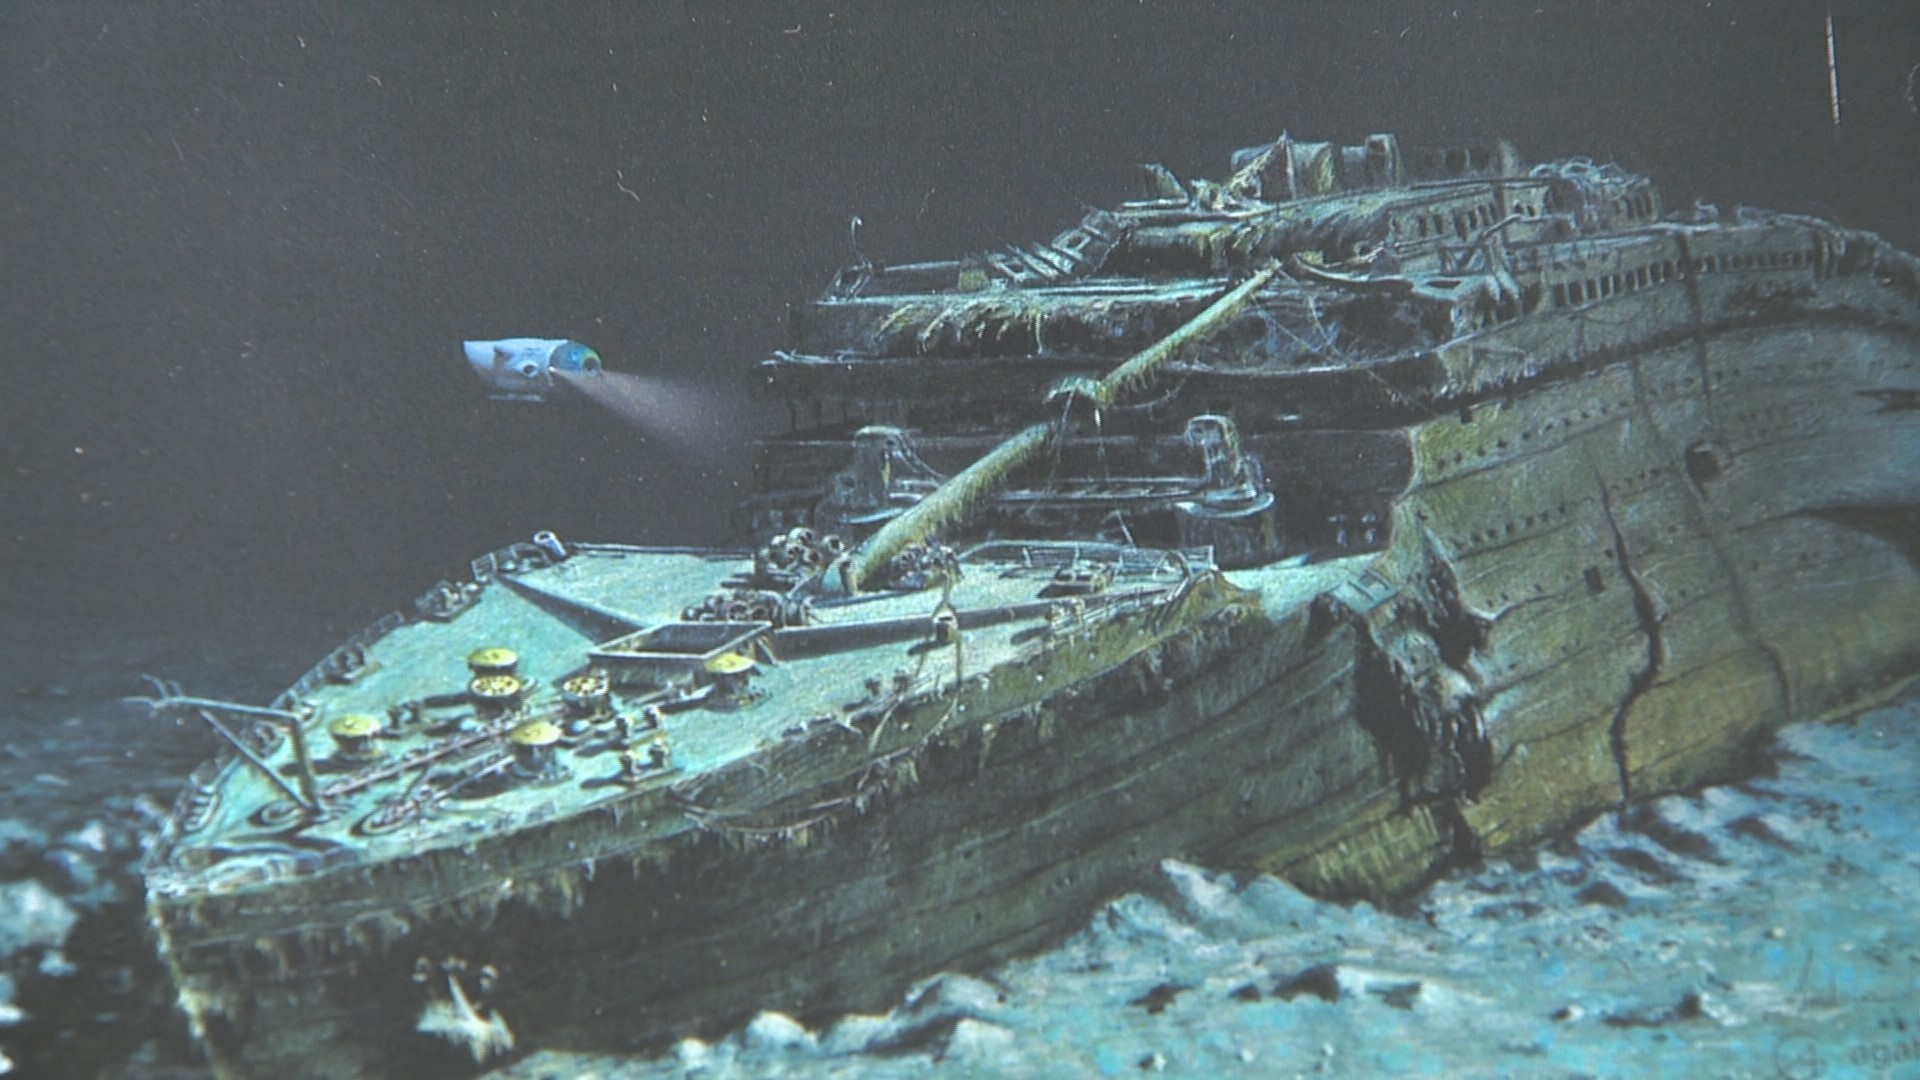

The RMS Titanic, a luxury steamship, sank in the early hours of April 15, 1912, off the coast of Newfoundland in the North Atlantic after sideswiping an iceberg during its maiden voyage. Of the 2,240 passengers and crew on board, more than 1,500 lost their lives in the disaster.

<table align="left">
<tr style="background-color:seagreen;color:white;">
<td></td>
<td>Prediction of Survival on The Titanic</td>
<td></td>
</tr>
</table>

### CONTENT
<a id='content'></a>


1. [Exploratory Data Analysis](#phase1)
    * 1.1 [Data Review](#eda1)
    * 1.2 [Correlations](#eda2)
    * 1.3 [Outliers](#eda3)
    * 1.4 [Review of Features and Filling Missing Values](#eda4)


2. [Data pre-processing](#phase2)
    * 2.1 [Transformers for Encoders](#pre1)
    * 2.2 [Train-Test Split](#pre2)
    
    
3. [Model Building](#phase3)
    * 3.1 [GradientBoostingClassifier](#model1)
    * 3.2 [KNeighborsClassifier](#model2)
    * 3.3 [RandomForestClassifier](#model3)
    * 3.4 [XGBoostClassifier](#model4)
    
    
4. [Model Comparing](#phase4)

      
5. [Prediction](#conc)

<div class="alert alert-block alert-success">
    
<b>1. Exploratory Data Analysis<a id='phase1'></a></b>
    
</div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import skew
import math
import warnings
warnings.filterwarnings('ignore')

# Libraries for Style
from colorama import Fore, Style
from yellowbrick.style import set_palette
set_palette('flatui')

sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.float_format', '{:.3f}'.format)

## 1.1 Data Review
<a id='eda1'>

***train data***

In [2]:
train_data = pd.read_csv('train.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S


In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train_data.shape, train_data.size

((891, 12), 10692)

In [5]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
train_data.duplicated().sum()

0

In [7]:
train_data.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [8]:
train_data[train_data.Survived==0].iloc[:,2:].describe().style.background_gradient(cmap='twilight_r')

,Pclass,Age,SibSp,Parch,Fare
count,549.000000,424.000000,549.000000,549.000000,549.000000
mean,2.531876,30.626179,0.553734,0.329690,22.117887
std,0.735805,14.172110,1.288399,0.823166,31.388207
min,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.000000,21.000000,0.000000,0.000000,7.854200
50%,3.000000,28.000000,0.000000,0.000000,10.500000
75%,3.000000,39.000000,1.000000,0.000000,26.000000
max,3.000000,74.000000,8.000000,6.000000,263.000000


In [9]:
train_data[train_data.Survived==1].iloc[:,2:].describe().style.background_gradient(cmap='twilight_r')

,Pclass,Age,SibSp,Parch,Fare
count,342.000000,290.000000,342.000000,342.000000,342.000000
mean,1.950292,28.343690,0.473684,0.464912,48.395408
std,0.863321,14.950952,0.708688,0.771712,66.596998
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,1.000000,19.000000,0.000000,0.000000,12.475000
50%,2.000000,28.000000,0.000000,0.000000,26.000000
75%,3.000000,36.000000,1.000000,1.000000,57.000000
max,3.000000,80.000000,4.000000,5.000000,512.329200


***test data***

In [10]:
test_data = pd.read_csv('test.csv')
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.500,0,0,330911,7.829,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.000,1,0,363272,7.000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.000,0,0,240276,9.688,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.000,0,0,315154,8.662,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.000,1,1,3101298,12.287,NaN,S


In [11]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [12]:
test_data.shape, test_data.size

((418, 11), 4598)

In [13]:
test_data.isnull().sum()
# there are missing values on the test data

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## 1.2 Correlations
<a id='eda2'>

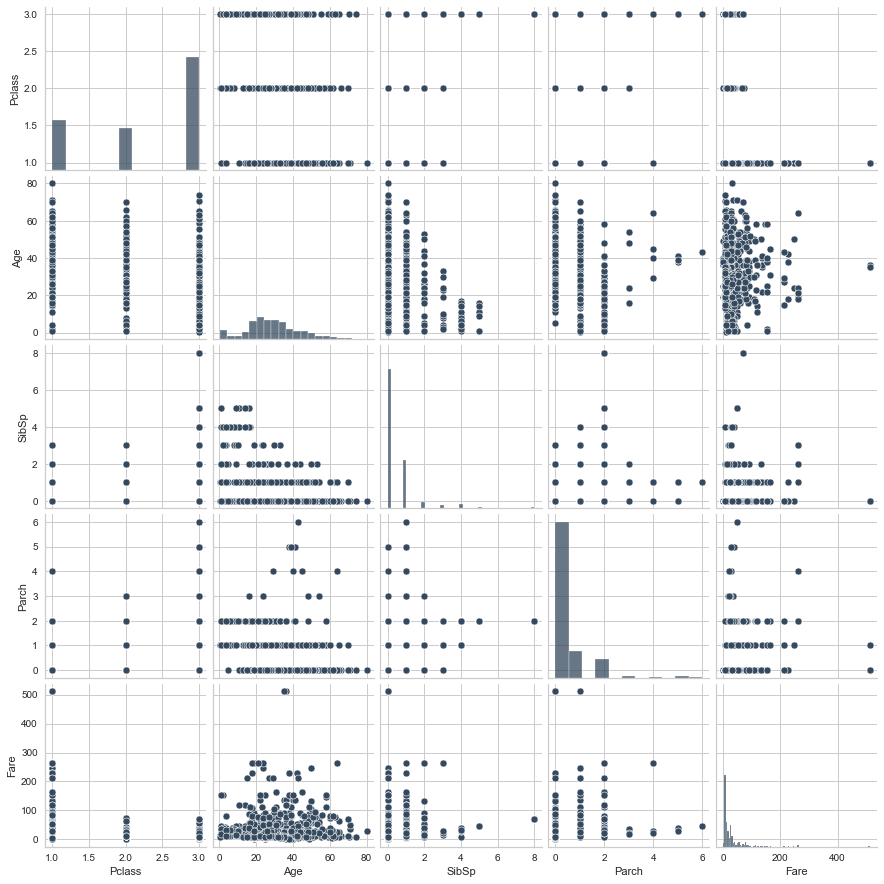

In [14]:
sns.pairplot(train_data.iloc[:, 2:])

<AxesSubplot:>

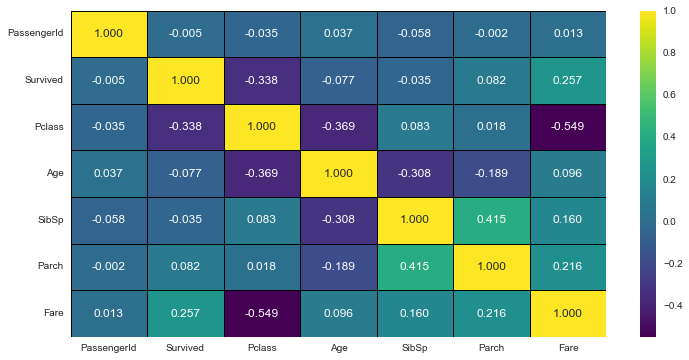

In [15]:
plt.figure(figsize=(12, 6))
sns.heatmap(train_data.corr(), annot=True, cmap='viridis', linewidth=1, linecolor='black', fmt='.3f')

<AxesSubplot:>

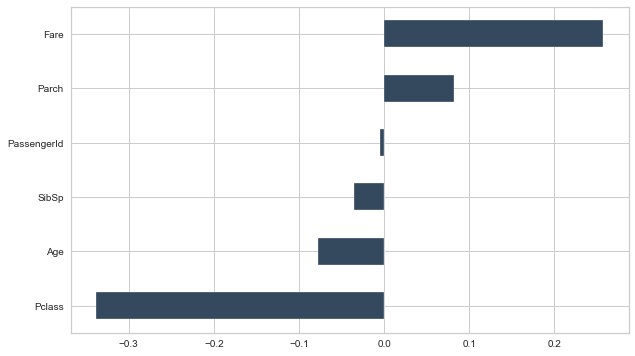

In [16]:
train_data.corr()['Survived'].drop('Survived').sort_values().plot.barh()

## 1.3 Outliers
<a id='eda3'>

In [17]:
# OUTLIERS

iqr_factor = [1.5, 2]
list1, list2 = [], []

for factor in iqr_factor:
    count = 0
    print(f'Outliers for {factor} IQR :')
    print('-------------------------------------')
    for col in train_data.select_dtypes(['int64', 'float64']):
    
        IQR = train_data[col].quantile(0.75) - train_data[col].quantile(0.25)
        lower_lim = train_data[col].quantile(0.25) - factor*IQR
        upper_lim = train_data[col].quantile(0.75) + factor*IQR
    
        cond = train_data[(train_data[col] < lower_lim) | (train_data[col] > upper_lim)].shape[0]
        
        if cond > 0 and factor == 1.5:
            list1.append(train_data[(train_data[col] < lower_lim) | (train_data[col] > upper_lim)].index.tolist())
        elif cond > 0 and factor == 2:
            list2.append(train_data[(train_data[col] < lower_lim) | (train_data[col] > upper_lim)].index.tolist())
        
        if cond > 0: print(f'{col:<30} : ', cond); count += cond
    print(f'\n{Fore.BLUE}TOTAL OUTLIERS FOR {factor} IQR : {count}{Style.RESET_ALL}')
    print('')

Outliers for 1.5 IQR :
-------------------------------------
Age                            :  11
SibSp                          :  46
Parch                          :  213
Fare                           :  116

TOTAL OUTLIERS FOR 1.5 IQR : 386

Outliers for 2 IQR :
-------------------------------------
Age                            :  2
SibSp                          :  30
Parch                          :  213
Fare                           :  92

TOTAL OUTLIERS FOR 2 IQR : 337



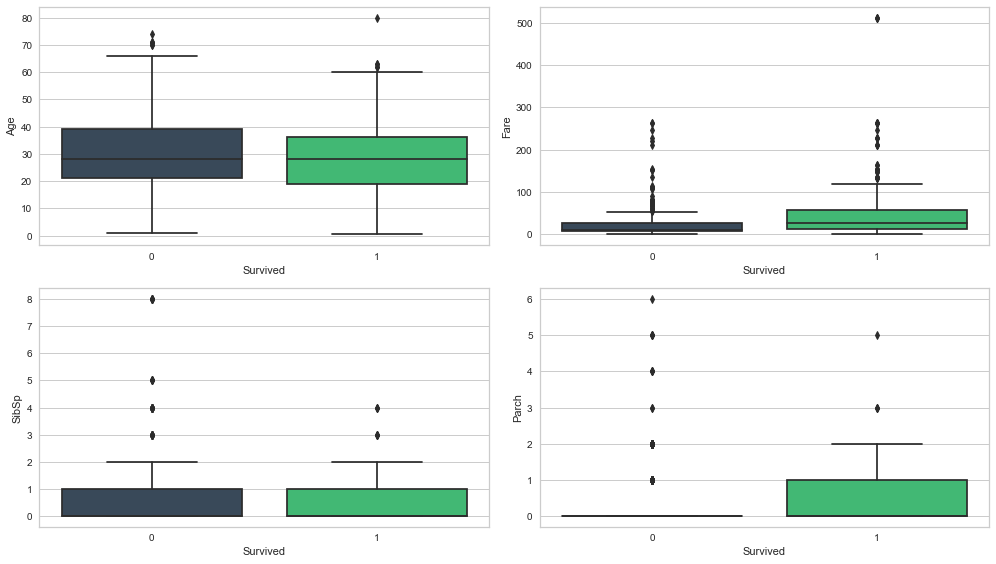

In [18]:
fig, ax = plt.subplots(2,2, figsize=(14,8))
sns.boxplot(data=train_data, x='Survived', y='Age', ax=ax[0,0])
sns.boxplot(data=train_data, x='Survived', y='Fare', ax=ax[0,1])
sns.boxplot(data=train_data, x='Survived', y='SibSp', ax=ax[1,0])
sns.boxplot(data=train_data, x='Survived', y='Parch', ax=ax[1,1])

plt.tight_layout();

## 1.4 Review of Features and Filling Missing Values
<a id='eda4'>

[CONTENT](#content)

In [19]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

***Pclass***

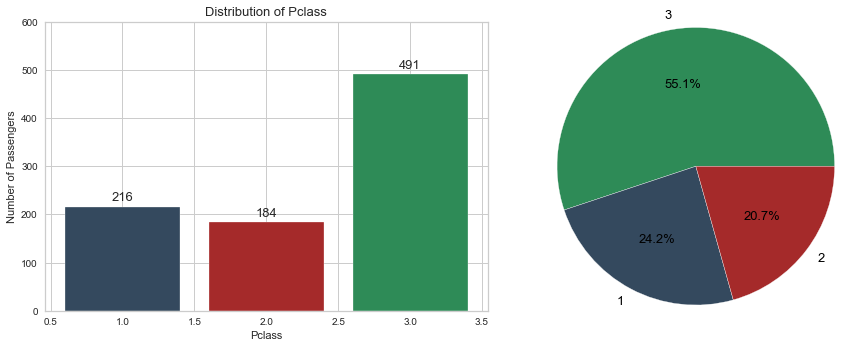

In [20]:
plt.figure(figsize=(13,5))

x = train_data['Pclass'].value_counts().index
y = train_data['Pclass'].value_counts().values

plt.subplot(121)
g = plt.bar(x,y,label='Pclass', color=['seagreen','#34495E', 'brown'])
plt.bar_label(g, padding=3, size=13), plt.ylim(0, 600)

plt.xlabel('Pclass'), plt.ylabel('Number of Passengers') 
plt.title('Distribution of Pclass', size=13)
   
plt.subplot(122)
plt.pie(y, labels=x, autopct='%0.1f%%', radius=1.2, textprops={'color':'black','fontsize': 13}, 
        colors=['seagreen','#34495E', 'brown'])

plt.tight_layout();

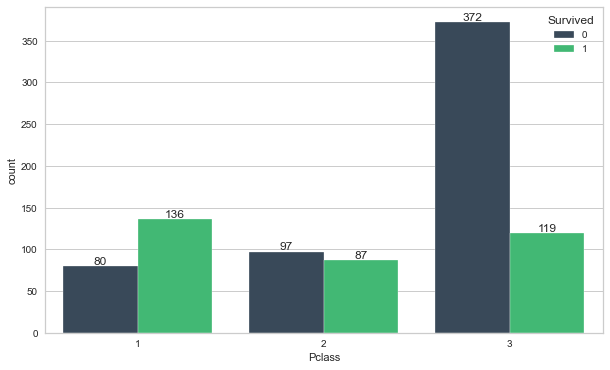

In [21]:
g = sns.countplot(data=train_data, x='Pclass', hue='Survived')
g.bar_label(g.containers[0]), g.bar_label(g.containers[1]);

***sex***

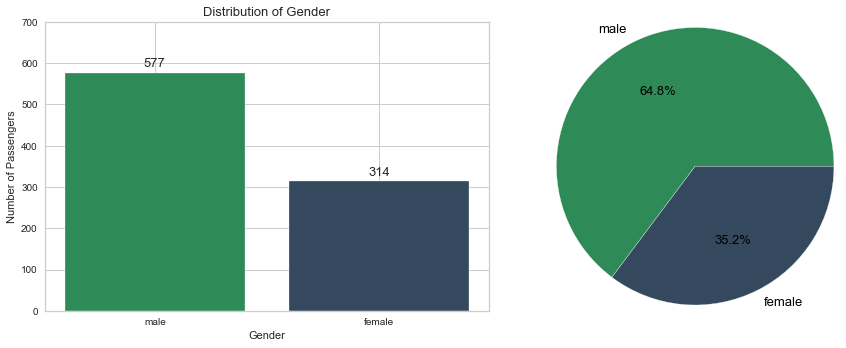

In [22]:
plt.figure(figsize=(13,5))

x = train_data['Sex'].value_counts().index
y = train_data['Sex'].value_counts().values

plt.subplot(121)
g = plt.bar(x,y,label='Sex', color=['seagreen','#34495E'])
plt.bar_label(g, padding=3, size=13), plt.ylim(0, 700)

plt.xlabel('Gender'), plt.ylabel('Number of Passengers') 
plt.title('Distribution of Gender', size=13)
    
plt.subplot(122)
plt.pie(y, labels=x, autopct='%0.1f%%', radius=1.2, textprops={'color':'black','fontsize': 13}, 
        colors=['seagreen','#34495E'])

plt.tight_layout();

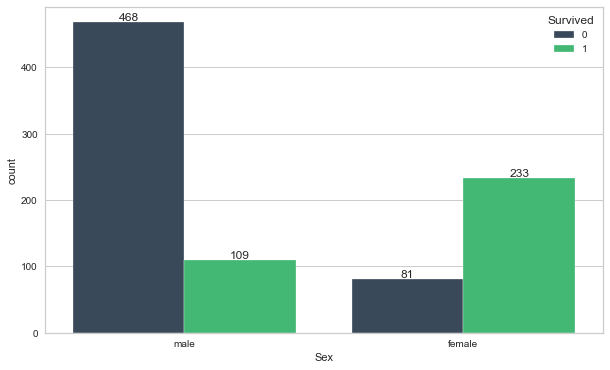

In [23]:
g = sns.countplot(data=train_data, x='Sex', hue='Survived')
g.bar_label(g.containers[0]), g.bar_label(g.containers[1]);

***SibSp - Parch*** 

SibSp: Number of siblings and spouses of the passenger aboard

Parch: Number of parents and children of the passenger aboard

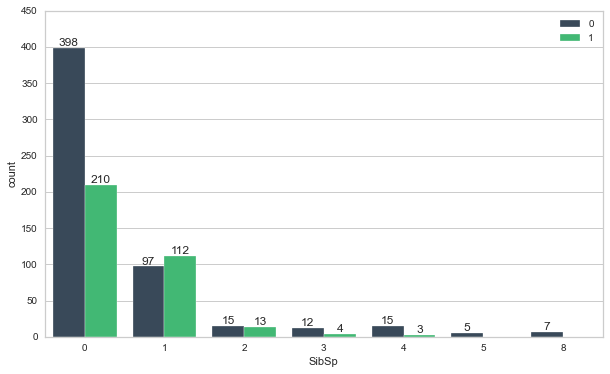

In [24]:
g = sns.countplot(data=train_data, x='SibSp', hue='Survived')
g.bar_label(g.containers[0]), g.bar_label(g.containers[1])
g.set_ylim(0,450), plt.legend(loc='upper right');

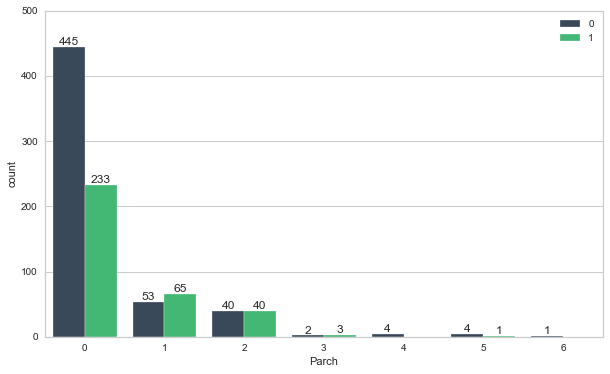

In [25]:
g = sns.countplot(data=train_data, x='Parch', hue='Survived')
g.bar_label(g.containers[0]), g.bar_label(g.containers[1])
g.set_ylim(0,500), plt.legend(loc='upper right');

***Age***

<AxesSubplot:xlabel='Age', ylabel='Count'>

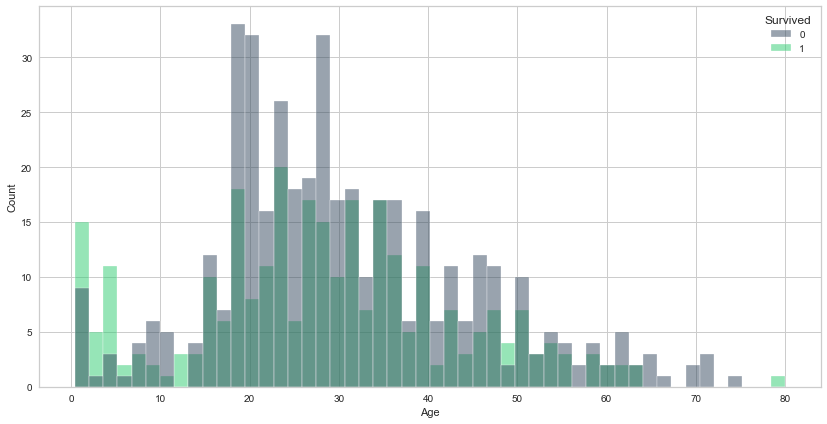

In [26]:
plt.figure(figsize=(14,7))
sns.histplot(data=train_data, x='Age', hue='Survived', bins=50)

In [27]:
train_data.Age.isnull().sum()

177

In [28]:
train_data[train_data.Age.isnull()][['SibSp', 'Parch']].describe().T

,count,mean,std,min,25%,50%,75%,max
SibSp,177.000,0.565,1.626,0.000,0.000,0.000,0.000,8.000
Parch,177.000,0.181,0.534,0.000,0.000,0.000,0.000,2.000


In [29]:
train_data.groupby(['SibSp']).Age.mean()

SibSp
0   31.398
1   30.090
2   22.620
3   13.917
4    7.056
5   10.200
8      NaN
Name: Age, dtype: float64

In [30]:
train_data.groupby(['SibSp', 'Parch']).Age.mean()

SibSp  Parch
0      0       32.220
       1       29.525
       2       20.993
       3       24.000
       4       29.000
       5       40.000
1      0       32.069
       1       27.065
       2       20.466
       3       39.333
       4       49.667
       5       38.667
       6       43.000
2      0       31.846
       1        8.357
       2       17.250
       3       24.000
3      0       31.500
       1        4.333
       2       13.000
4      1        6.778
       2        7.333
5      2       10.200
8      2          NaN
Name: Age, dtype: float64

In [31]:
train_data.Age.fillna(train_data.groupby(['SibSp','Parch']).Age.transform('mean'), inplace=True)
train_data.Age.fillna(train_data[train_data.SibSp>4].Age.mean(), inplace=True)

In [32]:
test_data.Age.fillna(train_data.groupby(['SibSp','Parch']).Age.transform('mean'), inplace=True)

***Embarked*** 
    
Port of embarkation of the passenger (C = Cherbourg; Q = Queenstown; S = Southampton)

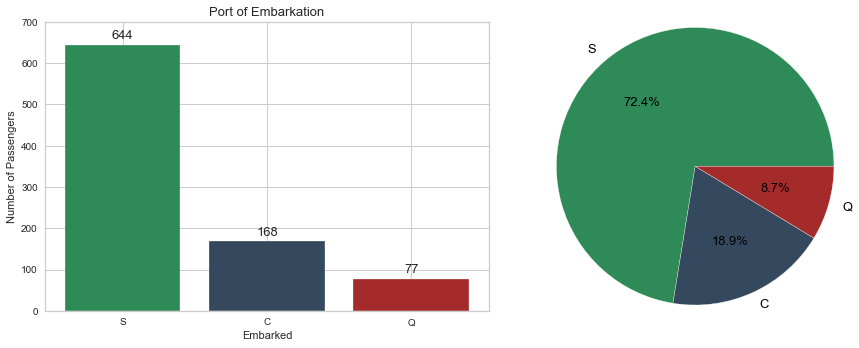

In [33]:
plt.figure(figsize=(13,5))

x = train_data['Embarked'].value_counts().index
y = train_data['Embarked'].value_counts().values

plt.subplot(121)
g = plt.bar(x,y,label='Embarked',color=['seagreen','#34495E', 'brown'])
plt.bar_label(g, padding=3, size=13), plt.ylim(0, 700)

plt.xlabel('Embarked'), plt.ylabel('Number of Passengers') 
plt.title('Port of Embarkation', size=13)
    
plt.subplot(122)
plt.pie(y, labels=x, autopct='%0.1f%%', radius=1.2, textprops={'color':'black','fontsize': 13}, 
        colors=['seagreen','#34495E', 'brown'])

plt.tight_layout();

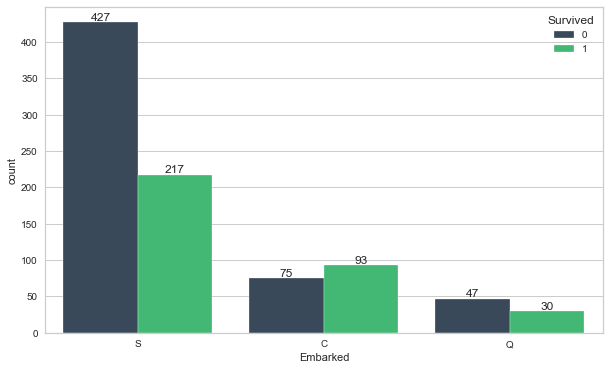

In [34]:
g = sns.countplot(data=train_data, x='Embarked', hue='Survived')
g.bar_label(g.containers[0]), g.bar_label(g.containers[1]);

In [35]:
train_data[train_data.Embarked.isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.000,0,0,113572,80.000,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.000,0,0,113572,80.000,B28,NaN


In [36]:
train_data.groupby(['Embarked', train_data.Pclass.astype(str)]).Fare.describe().style.background_gradient()

In [37]:
train_data[(train_data.Pclass==1) & (train_data.Fare>79) & (train_data.Fare<81)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.000,0,0,113572,80.000,B28,NaN
139,140,0,1,"Giglio, Mr. Victor",male,24.000,0,0,PC 17593,79.200,B86,C
256,257,1,1,"Thorne, Mrs. Gertrude Maybelle",female,32.220,0,0,PC 17585,79.200,NaN,C
262,263,0,1,"Taussig, Mr. Emil",male,52.000,1,1,110413,79.650,E67,S
558,559,1,1,"Taussig, Mrs. Emil (Tillie Mandelbaum)",female,39.000,1,1,110413,79.650,E67,S
585,586,1,1,"Taussig, Miss. Ruth",female,18.000,0,2,110413,79.650,E68,S
587,588,1,1,"Frolicher-Stehli, Mr. Maxmillian",male,60.000,1,1,13567,79.200,B41,C
789,790,0,1,"Guggenheim, Mr. Benjamin",male,46.000,0,0,PC 17593,79.200,B82 B84,C
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.000,0,0,113572,80.000,B28,NaN


In [38]:
train_data.Embarked.fillna('C', inplace=True)

***Fare***

<AxesSubplot:xlabel='Fare', ylabel='Count'>

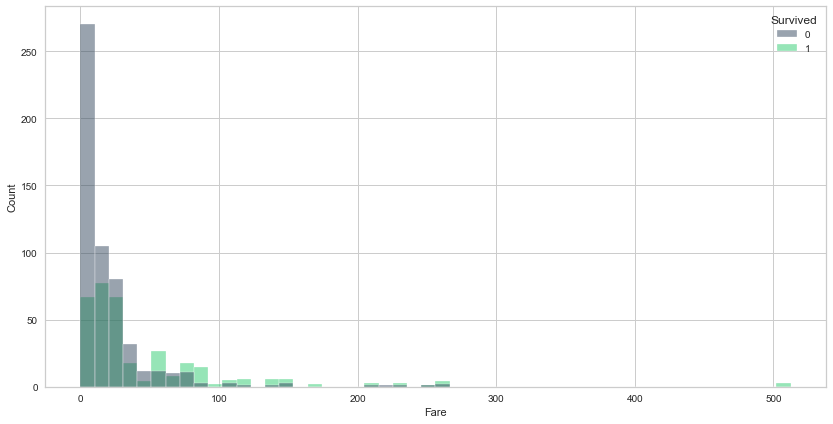

In [39]:
plt.figure(figsize=(14,7))
sns.histplot(data=train_data, x='Fare', hue='Survived', bins=50)

In [40]:
train_data.groupby('Survived').Fare.describe()

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,549.000,22.118,31.388,0.000,7.854,10.500,26.000,263.000
1,342.000,48.395,66.597,0.000,12.475,26.000,57.000,512.329


In [41]:
test_data[test_data.Fare.isna()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.500,0,0,3701,NaN,NaN,S


In [42]:
fare_value = train_data[(train_data.Pclass==3) & (train_data.Embarked=='S')].Fare.mean()

In [43]:
test_data.Fare.fillna(fare_value, inplace=True)

***survived***

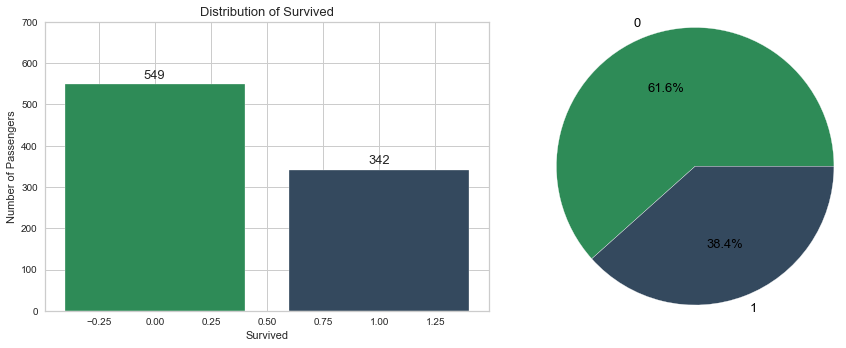

In [44]:
plt.figure(figsize=(13,5))

x = train_data['Survived'].value_counts().index
y = train_data['Survived'].value_counts().values

plt.subplot(121)
g = plt.bar(x,y,label='Survived',color=['seagreen','#34495E'])
plt.bar_label(g, padding=3, size=13), plt.ylim(0, 700)

plt.xlabel('Survived'), plt.ylabel('Number of Passengers') 
plt.title('Distribution of Survived', size=13)
    
plt.subplot(122)
plt.pie(y, labels=x, autopct='%0.1f%%', radius=1.2, textprops={'color':'black','fontsize': 13}, 
        colors=['seagreen','#34495E'])

plt.tight_layout();

***

In [45]:
train_data.drop(['PassengerId','Name','Ticket','Cabin'], 1, inplace=True)
test_data.drop(['PassengerId','Name','Ticket','Cabin'], 1, inplace=True)

In [46]:
print(train_data.isnull().sum().sum())
train_data.head(3)

0


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000,1,0,7.250,S
1,1,1,female,38.000,1,0,71.283,C
2,1,3,female,26.000,0,0,7.925,S


In [47]:
print(test_data.isnull().sum().sum())
test_data.head(3)

0


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.500,0,0,7.829,Q
1,3,female,47.000,1,0,7.000,S
2,2,male,62.000,0,0,9.688,Q


***

<div class="alert alert-block alert-success">
    
<b>2. Data Pre-Processing<a id='phase2'></a></b>
    
</div>

[CONTENT](#content)

## 2.1 Transformers for Encoders
<a id='pre1'>

In [48]:
from sklearn.compose import ColumnTransformer,make_column_transformer
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder

In [49]:
{column: list(train_data[column].unique()) for column in train_data.select_dtypes('O').columns}

{'Sex': ['male', 'female'], 'Embarked': ['S', 'C', 'Q']}

In [50]:
# for tree-based models
preprocessor1 = ColumnTransformer(transformers=[
    ('enc', OrdinalEncoder(), ['Sex', 'Embarked'])
], remainder='passthrough')

In [51]:
# for KNN
preprocessor2 = ColumnTransformer(transformers=[
    ('enc', OneHotEncoder(), ['Sex', 'Embarked'])
], remainder='passthrough')

## 2.2 Train-Test Split
<a id='pre2'>

In [52]:
X = train_data.drop('Survived', axis=1)
y = train_data['Survived']

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=15)

In [54]:
print("Train features shape : ", X_train.shape)
print("Test features shape  : ", X_test.shape)

Train features shape :  (712, 7)
Test features shape  :  (179, 7)


In [55]:
y_train.value_counts(), y_test.value_counts()

(0    439
 1    273
 Name: Survived, dtype: int64,
 0    110
 1     69
 Name: Survived, dtype: int64)

<div class="alert alert-block alert-success">
    
<b>3. Model Building<a id='phase3'></a></b>
    
</div>

[CONTENT](#content)

In [56]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler
from sklearn.pipeline import Pipeline, make_pipeline

from sklearn.model_selection import cross_val_score,cross_validate,GridSearchCV

from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix
from sklearn.metrics import accuracy_score, f1_score,recall_score,precision_score

In [57]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

## 3.1 GradientBoostingClassifier
<a id='model1'>

[CONTENT](#content)

In [58]:
gbc_model = Pipeline(steps=[
      ('preprocessor', preprocessor1),
      ('clf', GradientBoostingClassifier(random_state=42))
])

gbc_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('enc', OrdinalEncoder(),
                                                  ['Sex', 'Embarked'])])),
                ('clf', GradientBoostingClassifier(random_state=42))])

In [59]:
eval_metric(gbc_model, X_train, y_train, X_test, y_test)

Test_Set
[[94 16]
 [10 59]]
              precision    recall  f1-score   support

           0       0.90      0.85      0.88       110
           1       0.79      0.86      0.82        69

    accuracy                           0.85       179
   macro avg       0.85      0.85      0.85       179
weighted avg       0.86      0.85      0.86       179


Train_Set
[[417  22]
 [ 50 223]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       439
           1       0.91      0.82      0.86       273

    accuracy                           0.90       712
   macro avg       0.90      0.88      0.89       712
weighted avg       0.90      0.90      0.90       712



In [60]:
cross_val_score(gbc_model, X_train, y_train, cv=10, scoring='accuracy').mean()

0.8217527386541471

In [61]:
cross_val_score(gbc_model, X_train, y_train, cv=10, scoring='recall').mean()

0.6964285714285714

In [62]:
# GRID SEARCH

model = Pipeline(steps=[
      ('preprocessor', preprocessor1),
      ('clf', GradientBoostingClassifier(random_state=42))
])

param_grid = {'clf__n_estimators': [64, 128, 150], 'clf__max_depth': [3, 4], 'clf__subsample': [0.5, 1], 
              'clf__max_features' : [None, 3, 4, 5], 'clf__learning_rate': [0.02, 0.05, 0.1, 0.3]} 

%time gbc_grid_model = GridSearchCV(model, param_grid, scoring='accuracy', cv=10, verbose=1, n_jobs=-1).fit(X_train, y_train)

print('\n', gbc_grid_model.best_params_)
print('\n', gbc_grid_model.best_estimator_)
print('\n', 'Best Score :', gbc_grid_model.best_score_)

Fitting 10 folds for each of 192 candidates, totalling 1920 fits
Wall time: 1min 20s

 {'clf__learning_rate': 0.05, 'clf__max_depth': 4, 'clf__max_features': 5, 'clf__n_estimators': 128, 'clf__subsample': 0.5}

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('enc', OrdinalEncoder(),
                                                  ['Sex', 'Embarked'])])),
                ('clf',
                 GradientBoostingClassifier(learning_rate=0.05, max_depth=4,
                                            max_features=5, n_estimators=128,
                                            random_state=42, subsample=0.5))])

 Best Score : 0.8330203442879499


In [63]:
eval_metric(gbc_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[93 17]
 [12 57]]
              precision    recall  f1-score   support

           0       0.89      0.85      0.87       110
           1       0.77      0.83      0.80        69

    accuracy                           0.84       179
   macro avg       0.83      0.84      0.83       179
weighted avg       0.84      0.84      0.84       179


Train_Set
[[425  14]
 [ 47 226]]
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       439
           1       0.94      0.83      0.88       273

    accuracy                           0.91       712
   macro avg       0.92      0.90      0.91       712
weighted avg       0.92      0.91      0.91       712



In [64]:
gbc_model = Pipeline(steps=[
      ('preprocessor', preprocessor1),
      ('clf', GradientBoostingClassifier(learning_rate=0.04, max_features=5, n_estimators=215, random_state=42, subsample=0.5))
])            # some parameters were changed due to overfitting

gbc_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('enc', OrdinalEncoder(),
                                                  ['Sex', 'Embarked'])])),
                ('clf',
                 GradientBoostingClassifier(learning_rate=0.04, max_features=5,
                                            n_estimators=215, random_state=42,
                                            subsample=0.5))])

In [65]:
eval_metric(gbc_model, X_train, y_train, X_test, y_test)

Test_Set
[[96 14]
 [11 58]]
              precision    recall  f1-score   support

           0       0.90      0.87      0.88       110
           1       0.81      0.84      0.82        69

    accuracy                           0.86       179
   macro avg       0.85      0.86      0.85       179
weighted avg       0.86      0.86      0.86       179


Train_Set
[[413  26]
 [ 51 222]]
              precision    recall  f1-score   support

           0       0.89      0.94      0.91       439
           1       0.90      0.81      0.85       273

    accuracy                           0.89       712
   macro avg       0.89      0.88      0.88       712
weighted avg       0.89      0.89      0.89       712



In [66]:
cross_val_score(gbc_model, X_train, y_train, cv=10, scoring='accuracy').mean()

0.8330203442879499

In [67]:
cross_val_score(gbc_model, X_train, y_train, cv=10, scoring='recall').mean()

0.7186507936507937

In [68]:
y_train_pred = gbc_model.predict(X_train)
y_pred = gbc_model.predict(X_test)

gbc_test_accuracy = accuracy_score(y_test, y_pred)
gbc_train_accuracy = accuracy_score(y_train, y_train_pred)
gbc_crosvalscore_accuracy = cross_val_score(gbc_model, X_train, y_train, cv=10, scoring='accuracy').mean()

gbc_test_recall = recall_score(y_test, y_pred)
gbc_train_recall = recall_score(y_train, y_train_pred)
gbc_crosvalscore_recall = cross_val_score(gbc_model, X_train, y_train, cv=10, scoring='recall').mean()

## 3.2 KNeighborsClassifier
<a id='model2'>

[CONTENT](#content)

In [69]:
knn_model = Pipeline(steps=[
      ('preprocessor', preprocessor2),
      ('scaler', MinMaxScaler()),
      ('clf', KNeighborsClassifier())
])

knn_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('enc', OneHotEncoder(),
                                                  ['Sex', 'Embarked'])])),
                ('scaler', MinMaxScaler()), ('clf', KNeighborsClassifier())])

In [70]:
eval_metric(knn_model, X_train, y_train, X_test, y_test)

Test_Set
[[94 16]
 [13 56]]
              precision    recall  f1-score   support

           0       0.88      0.85      0.87       110
           1       0.78      0.81      0.79        69

    accuracy                           0.84       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179


Train_Set
[[402  37]
 [ 58 215]]
              precision    recall  f1-score   support

           0       0.87      0.92      0.89       439
           1       0.85      0.79      0.82       273

    accuracy                           0.87       712
   macro avg       0.86      0.85      0.86       712
weighted avg       0.87      0.87      0.87       712



In [71]:
cross_val_score(knn_model, X_train, y_train, cv=10, scoring='accuracy').mean()

0.7965962441314554

In [72]:
cross_val_score(knn_model, X_train, y_train, cv=10, scoring='recall').mean()

0.6706349206349206

In [73]:
# GRID SEARCH

model = Pipeline(steps=[('preprocessor', preprocessor2),('scaler', MinMaxScaler()),('clf', KNeighborsClassifier())])

param_grid = {'clf__n_neighbors': range(1,25), 'clf__p': [1,2], 'clf__weights': ['uniform', 'distance'],
              'clf__leaf_size': [10, 15, 25]}

knn_grid_model = GridSearchCV(model, param_grid, cv=10, verbose=1, scoring='balanced_accuracy', n_jobs=-1)

%time knn_grid_model.fit(X_train,y_train)

print('\n', knn_grid_model.best_params_)
print('\n', knn_grid_model.best_estimator_)
print('\n', 'Best Score :', knn_grid_model.best_score_)

Fitting 10 folds for each of 288 candidates, totalling 2880 fits
Wall time: 12.4 s

 {'clf__leaf_size': 10, 'clf__n_neighbors': 3, 'clf__p': 1, 'clf__weights': 'uniform'}

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('enc', OneHotEncoder(),
                                                  ['Sex', 'Embarked'])])),
                ('scaler', MinMaxScaler()),
                ('clf',
                 KNeighborsClassifier(leaf_size=10, n_neighbors=3, p=1))])

 Best Score : 0.7804873206035997


In [74]:
eval_metric(knn_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[89 21]
 [12 57]]
              precision    recall  f1-score   support

           0       0.88      0.81      0.84       110
           1       0.73      0.83      0.78        69

    accuracy                           0.82       179
   macro avg       0.81      0.82      0.81       179
weighted avg       0.82      0.82      0.82       179


Train_Set
[[400  39]
 [ 54 219]]
              precision    recall  f1-score   support

           0       0.88      0.91      0.90       439
           1       0.85      0.80      0.82       273

    accuracy                           0.87       712
   macro avg       0.86      0.86      0.86       712
weighted avg       0.87      0.87      0.87       712



In [75]:
y_train_pred = knn_model.predict(X_train)
y_pred = knn_model.predict(X_test)

knn_test_accuracy = accuracy_score(y_test, y_pred)
knn_train_accuracy = accuracy_score(y_train, y_train_pred)
knn_crosvalscore_accuracy = cross_val_score(knn_model, X_train, y_train, cv=10, scoring='accuracy').mean()

knn_test_recall = recall_score(y_test, y_pred)
knn_train_recall = recall_score(y_train, y_train_pred)
knn_crosvalscore_recall = cross_val_score(knn_model, X_train, y_train, cv=10, scoring='recall').mean()

## 3.3 RandomForestClassifier
<a id='model3'>

[CONTENT](#content)

In [76]:
rf_model = Pipeline(steps=[
      ('preprocessor', preprocessor1),
      ('clf', RandomForestClassifier(random_state=42))
])

rf_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('enc', OrdinalEncoder(),
                                                  ['Sex', 'Embarked'])])),
                ('clf', RandomForestClassifier(random_state=42))])

In [77]:
eval_metric(rf_model, X_train, y_train, X_test, y_test)

Test_Set
[[88 22]
 [10 59]]
              precision    recall  f1-score   support

           0       0.90      0.80      0.85       110
           1       0.73      0.86      0.79        69

    accuracy                           0.82       179
   macro avg       0.81      0.83      0.82       179
weighted avg       0.83      0.82      0.82       179


Train_Set
[[437   2]
 [ 10 263]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       439
           1       0.99      0.96      0.98       273

    accuracy                           0.98       712
   macro avg       0.99      0.98      0.98       712
weighted avg       0.98      0.98      0.98       712



In [78]:
cross_val_score(rf_model, X_train, y_train, cv=10, scoring='accuracy').mean()

0.8147104851330204

In [79]:
cross_val_score(rf_model, X_train, y_train, cv=10, scoring='recall').mean()

0.7291005291005291

In [80]:
# class-weight

rf_model = Pipeline(steps=[
      ('preprocessor', preprocessor1),
      ('clf', RandomForestClassifier(max_depth=6, class_weight={0:1, 1:1.2}, random_state=42))
])

rf_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('enc', OrdinalEncoder(),
                                                  ['Sex', 'Embarked'])])),
                ('clf',
                 RandomForestClassifier(class_weight={0: 1, 1: 1.2},
                                        max_depth=6, random_state=42))])

In [81]:
eval_metric(rf_model, X_train, y_train, X_test, y_test)

Test_Set
[[95 15]
 [12 57]]
              precision    recall  f1-score   support

           0       0.89      0.86      0.88       110
           1       0.79      0.83      0.81        69

    accuracy                           0.85       179
   macro avg       0.84      0.84      0.84       179
weighted avg       0.85      0.85      0.85       179


Train_Set
[[412  27]
 [ 60 213]]
              precision    recall  f1-score   support

           0       0.87      0.94      0.90       439
           1       0.89      0.78      0.83       273

    accuracy                           0.88       712
   macro avg       0.88      0.86      0.87       712
weighted avg       0.88      0.88      0.88       712



In [82]:
cross_val_score(rf_model, X_train, y_train, cv=10, scoring='accuracy').mean()

0.8190336463223786

In [83]:
cross_val_score(rf_model, X_train, y_train, cv=10, scoring='recall').mean()

0.6935185185185186

In [84]:
# GRID SEARCH

model = Pipeline(steps=[('preprocessor', preprocessor1), ('clf', RandomForestClassifier(random_state=42))])

param_grid = {'clf__n_estimators':[64, 100, 128, 200],
              'clf__max_features':[3, 5, 'auto'],
              'clf__max_depth':[5, 6, 7],
              'clf__min_samples_split':[2, 5, 8]}

rf_grid_model = GridSearchCV(model, param_grid, cv=10, verbose=1, scoring='accuracy', n_jobs=-1)

%time rf_grid_model.fit(X_train,y_train)

print('\n', rf_grid_model.best_params_)
print('\n', rf_grid_model.best_estimator_)
print('\n', 'Best Score :', rf_grid_model.best_score_)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits
Wall time: 1min 18s

 {'clf__max_depth': 7, 'clf__max_features': 'auto', 'clf__min_samples_split': 5, 'clf__n_estimators': 200}

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('enc', OrdinalEncoder(),
                                                  ['Sex', 'Embarked'])])),
                ('clf',
                 RandomForestClassifier(max_depth=7, min_samples_split=5,
                                        n_estimators=200, random_state=42))])

 Best Score : 0.837245696400626


In [85]:
eval_metric(rf_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[95 15]
 [13 56]]
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       110
           1       0.79      0.81      0.80        69

    accuracy                           0.84       179
   macro avg       0.83      0.84      0.84       179
weighted avg       0.84      0.84      0.84       179


Train_Set
[[422  17]
 [ 58 215]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       439
           1       0.93      0.79      0.85       273

    accuracy                           0.89       712
   macro avg       0.90      0.87      0.88       712
weighted avg       0.90      0.89      0.89       712



In [86]:
rf_model = Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('enc', OrdinalEncoder(),
                                                  ['Sex', 'Embarked'])])),
                ('clf', RandomForestClassifier(max_depth=7, min_samples_split=5,
                                               n_estimators=200, random_state=42))]).fit(X_train,y_train)

In [87]:
eval_metric(rf_model, X_train, y_train, X_test, y_test)

Test_Set
[[95 15]
 [13 56]]
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       110
           1       0.79      0.81      0.80        69

    accuracy                           0.84       179
   macro avg       0.83      0.84      0.84       179
weighted avg       0.84      0.84      0.84       179


Train_Set
[[422  17]
 [ 58 215]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       439
           1       0.93      0.79      0.85       273

    accuracy                           0.89       712
   macro avg       0.90      0.87      0.88       712
weighted avg       0.90      0.89      0.89       712



In [88]:
cross_val_score(rf_model, X_train, y_train, cv=10, scoring='accuracy').mean()

0.837245696400626

In [89]:
cross_val_score(rf_model, X_train, y_train, cv=10, scoring='recall').mean()

0.7078042328042328

In [90]:
y_train_pred = rf_model.predict(X_train)
y_pred = rf_model.predict(X_test)

rf_test_accuracy = accuracy_score(y_test, y_pred)
rf_train_accuracy = accuracy_score(y_train, y_train_pred)
rf_crosvalscore_accuracy = cross_val_score(rf_model, X_train, y_train, cv=10, scoring='accuracy').mean()

rf_test_recall = recall_score(y_test, y_pred)
rf_train_recall = recall_score(y_train, y_train_pred)
rf_crosvalscore_recall = cross_val_score(rf_model, X_train, y_train, cv=10, scoring='recall').mean()

## 3.4 XGBoost Classifier
<a id='model4'>

[CONTENT](#content)

In [91]:
xgb_model = Pipeline(steps=[
      ('preprocessor', preprocessor1),
      ('clf', XGBClassifier(eval_metric='logloss', random_state=42))
])

xgb_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('enc', OrdinalEncoder(),
                                                  ['Sex', 'Embarked'])])),
                ('clf',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, enable_categorical=False,
                               eval_metric='logloss', gamma=0, gpu_id=-1,
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=8, num_parallel_tree=1, predictor='auto',
                               random_state=42, reg_alp

In [92]:
eval_metric(xgb_model, X_train, y_train, X_test, y_test)

Test_Set
[[91 19]
 [13 56]]
              precision    recall  f1-score   support

           0       0.88      0.83      0.85       110
           1       0.75      0.81      0.78        69

    accuracy                           0.82       179
   macro avg       0.81      0.82      0.81       179
weighted avg       0.83      0.82      0.82       179


Train_Set
[[437   2]
 [ 19 254]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       439
           1       0.99      0.93      0.96       273

    accuracy                           0.97       712
   macro avg       0.98      0.96      0.97       712
weighted avg       0.97      0.97      0.97       712



In [93]:
cross_val_score(xgb_model, X_train, y_train, cv=10, scoring='accuracy').mean()

0.8105438184663537

In [94]:
cross_val_score(xgb_model, X_train, y_train, cv=10, scoring='recall').mean()

0.7369047619047618

In [95]:
xgb_model = Pipeline(steps=[
      ('preprocessor', preprocessor1),
      ('clf', XGBClassifier(eval_metric='logloss', max_depth=3, scale_pos_weight=1.2, learning_rate=0.1, random_state=42))
])

xgb_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('enc', OrdinalEncoder(),
                                                  ['Sex', 'Embarked'])])),
                ('clf',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, enable_categorical=False,
                               eval_metric='logloss', gamma=0, gpu_id=-1,
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.1, max_delta_step=0, max_depth=3,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=8, num_parallel_tree=1, predictor='auto',
                               random_state=42, reg_alpha=0, re

In [96]:
eval_metric(xgb_model, X_train, y_train, X_test, y_test)

Test_Set
[[94 16]
 [11 58]]
              precision    recall  f1-score   support

           0       0.90      0.85      0.87       110
           1       0.78      0.84      0.81        69

    accuracy                           0.85       179
   macro avg       0.84      0.85      0.84       179
weighted avg       0.85      0.85      0.85       179


Train_Set
[[402  37]
 [ 51 222]]
              precision    recall  f1-score   support

           0       0.89      0.92      0.90       439
           1       0.86      0.81      0.83       273

    accuracy                           0.88       712
   macro avg       0.87      0.86      0.87       712
weighted avg       0.88      0.88      0.88       712



In [97]:
cross_val_score(xgb_model, X_train, y_train, cv=10, scoring='accuracy').mean()

0.8231611893583726

In [98]:
cross_val_score(xgb_model, X_train, y_train, cv=10, scoring='recall').mean()

0.744047619047619

In [99]:
# GRID SEARCH

model = Pipeline(steps=[
      ('preprocessor', preprocessor1),
      ('clf', XGBClassifier(eval_metric='logloss', random_state=42))
])

param_grid = {'clf__n_estimators':[64, 100, 128], 'clf__max_depth':[3, 4], 'clf__learning_rate': [0.07, 0.1, 0.3, 0.5],
              'clf__subsample':[0.8, 1], "clf__colsample_bytree":[0.5, 0.7, 1]}

xgb_grid_model = GridSearchCV(model, param_grid, cv=10, verbose=1, scoring='accuracy', n_jobs=-1)

%time xgb_grid_model.fit(X_train,y_train)

print('\n', xgb_grid_model.best_params_)
print('\n', xgb_grid_model.best_estimator_)
print('\n', 'Best Score :', xgb_grid_model.best_score_)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits
Wall time: 1min 33s

 {'clf__colsample_bytree': 0.7, 'clf__learning_rate': 0.3, 'clf__max_depth': 4, 'clf__n_estimators': 64, 'clf__subsample': 0.8}

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('enc', OrdinalEncoder(),
                                                  ['Sex', 'Embarked'])])),
                ('clf',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=0.7, enable_categorical=False,
                               eval_metric='logloss', gamma=0, gpu_id=-1,
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.3, max_delta_step=0, max_depth=4,
                               min_child_weight=1, missing=nan,
 

In [100]:
eval_metric(xgb_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[95 15]
 [13 56]]
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       110
           1       0.79      0.81      0.80        69

    accuracy                           0.84       179
   macro avg       0.83      0.84      0.84       179
weighted avg       0.84      0.84      0.84       179


Train_Set
[[419  20]
 [ 48 225]]
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       439
           1       0.92      0.82      0.87       273

    accuracy                           0.90       712
   macro avg       0.91      0.89      0.90       712
weighted avg       0.91      0.90      0.90       712



In [101]:
xgb_model = Pipeline(steps=[
      ('preprocessor', preprocessor1),
      ('clf', XGBClassifier(eval_metric='logloss', max_depth=3, scale_pos_weight=1.2, learning_rate=0.1, random_state=42))
]).fit(X_train,y_train)

In [102]:
cross_val_score(xgb_model, X_train, y_train, cv=10, scoring='accuracy').mean()

0.8231611893583726

In [103]:
cross_val_score(xgb_model, X_train, y_train, cv=10, scoring='recall').mean()

0.744047619047619

In [104]:
y_train_pred = xgb_model.predict(X_train)
y_pred = xgb_model.predict(X_test)

xgb_test_accuracy = accuracy_score(y_test, y_pred)
xgb_train_accuracy = accuracy_score(y_train, y_train_pred)
xgb_crosvalscore_accuracy = cross_val_score(xgb_model, X_train, y_train, cv=10, scoring='accuracy').mean()

xgb_test_recall = recall_score(y_test, y_pred)
xgb_train_recall = recall_score(y_train, y_train_pred)
xgb_crosvalscore_recall = cross_val_score(xgb_model, X_train, y_train, cv=10, scoring='recall').mean()

***

<div class="alert alert-block alert-success">
    
<b>4. MODEL COMPARING<a id='phase4'></b>
    
</div>

[CONTENT](#content)

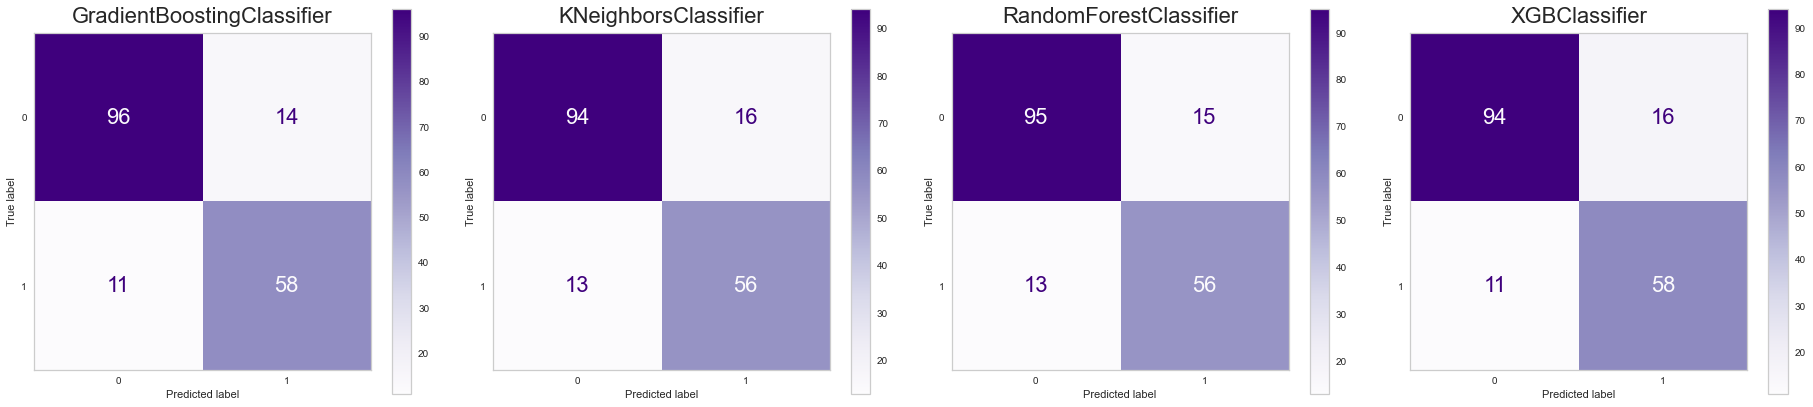

In [106]:
fig, axes = plt.subplots(1,4, figsize=(26,6))
plt.rcParams.update({'font.size': 22})

classifiers = [gbc_model, knn_model, rf_model, xgb_model]
for cls, ax in zip(classifiers, axes.flatten()):
    plot_confusion_matrix(cls, X_test, y_test, cmap=plt.cm.Purples, ax=ax)
    ax.grid(False)
    ax.set_title(type(cls.named_steps['clf']).__name__, size=22, pad=10)

plt.tight_layout()
plt.show()

In [107]:
compare = pd.DataFrame({
   'Model': ['Gradient Boosting', 'KNN',  'Random Forest', 'XGBoost'],
   'test_accuracy': [gbc_test_accuracy, knn_test_accuracy, rf_test_accuracy, xgb_test_accuracy],
   'train_accuracy': [gbc_train_accuracy, knn_train_accuracy, rf_train_accuracy, xgb_train_accuracy],
   'crossval_accuracy':[gbc_crosvalscore_accuracy,knn_crosvalscore_accuracy,rf_crosvalscore_accuracy,xgb_crosvalscore_accuracy],
   'test_recall': [gbc_test_recall, knn_test_recall, rf_test_recall, xgb_test_recall],
   'train_recall': [gbc_train_recall, knn_train_recall, rf_train_recall, xgb_train_recall],
   'crossval_recall':[gbc_crosvalscore_recall,knn_crosvalscore_recall,rf_crosvalscore_recall,xgb_crosvalscore_recall],
})

compare

,Model,test_accuracy,train_accuracy,crossval_accuracy,test_recall,train_recall,crossval_recall
0,Gradient Boosting,0.860,0.892,0.833,0.841,0.813,0.719
1,KNN,0.838,0.867,0.797,0.812,0.788,0.671
2,Random Forest,0.844,0.895,0.837,0.812,0.788,0.708
3,XGBoost,0.849,0.876,0.823,0.841,0.813,0.744


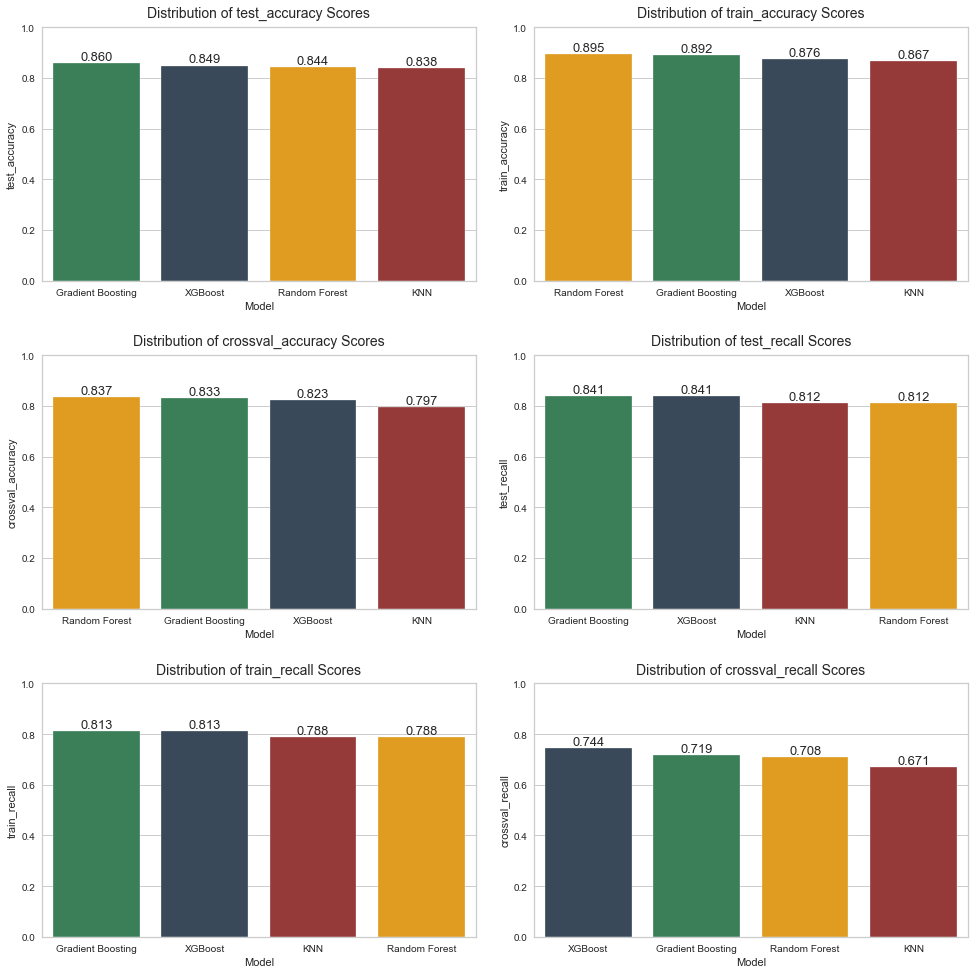

In [108]:
plt.figure(figsize=(14,14))

index = 0
colors={'Gradient Boosting': 'seagreen', 'Random Forest': 'orange', 'KNN': 'brown', 'XGBoost': '#34495E'}

for col in compare.iloc[:, 1:].columns:    
    index += 1
    plt.subplot(3,2,index)
    a = sns.barplot(data=compare.sort_values(col, ascending=False), x='Model', y=col, palette=colors)
    a.bar_label(a.containers[0], fmt='%.3f', fontsize=13), plt.ylim(0, 1)
    plt.title(f'Distribution of {col} Scores', fontsize=14, pad=10)
plt.tight_layout()

In [109]:
# FINAL MODEL

preprocessor = ColumnTransformer(transformers=[
    ('enc', OrdinalEncoder(), ['Sex', 'Embarked'])
], remainder='passthrough')

gbc_model = Pipeline(steps=[
      ('preprocessor', preprocessor),
      ('clf', GradientBoostingClassifier(learning_rate=0.04, max_features=5, n_estimators=215, random_state=42, subsample=0.5))
]).fit(X,y)

<div class="alert alert-block alert-success">
    
<b>5. PREDICTION OF TEST DATA<a id='conc'></b>
    
</div>

[CONTENT](#content)

In [110]:
test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.500,0,0,7.829,Q
1,3,female,47.000,1,0,7.000,S
2,2,male,62.000,0,0,9.688,Q
3,3,male,27.000,0,0,8.662,S
4,3,female,22.000,1,1,12.287,S


In [111]:
gbc_model.predict(test_data)

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [112]:
test_ids = pd.read_csv('test.csv')['PassengerId']
test_ids.head()

0    892
1    893
2    894
3    895
4    896
Name: PassengerId, dtype: int64

In [113]:
test_predictions = gbc_model.predict(test_data)
submission = pd.DataFrame({'PassengerId': test_ids.values, 'Survived': test_predictions})
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [114]:
submission.to_csv('submission.csv', index=False)